<a href="https://colab.research.google.com/github/AdityaShyamsundar/Unsupervised_ML_Netflix_Movies_and_TV-Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Submitted By**    - Aditya Shyamsundar


# **Project Summary -**

## **Data Preprocessing**
* Importing Libraries
* Mounting Drive and Loading Dataset
* Variable Description
* Handling Missing/Null Values
* Created two new columns 'month_added' & 'year_added'.
* Dropped 'date_added' column.
* Chose Primary Country and Listed in.

## **Exploratory Data Analysis (EDA)**
* Visualizing Movie & TV Show
* Visualizing Directors
* Visualizing Cast
* Visualizing Countries
* Visualizing Release Year
* Visualizing Movies Duration
* Visualizing Rating
* Visualizing Listed In (Genres)
* Visualizing Month Added
* Visualizing Year Added


## **Implementing Machine Learning Algorithms**
* K-Means Clustering
* Hierarchical clustering
* Content based recommender system

# **GitHub Link -**

https://github.com/AdityaShyamsundar

# **Problem Statement**


This dataset includes a collection of movies and TV shows that were available on Netflix in 2019, gathered from Flixable, a third-party search engine. According to an intriguing 2018 report, the number of TV shows on Netflix has almost tripled since 2010, while the number of movies has decreased by over 2,000 titles. Further analysis of this dataset could yield other valuable insights. Combining this dataset with external sources such as IMDB ratings and Rotten Tomatoes could also reveal many fascinating discoveries.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Projects/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',encoding = 'latin')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


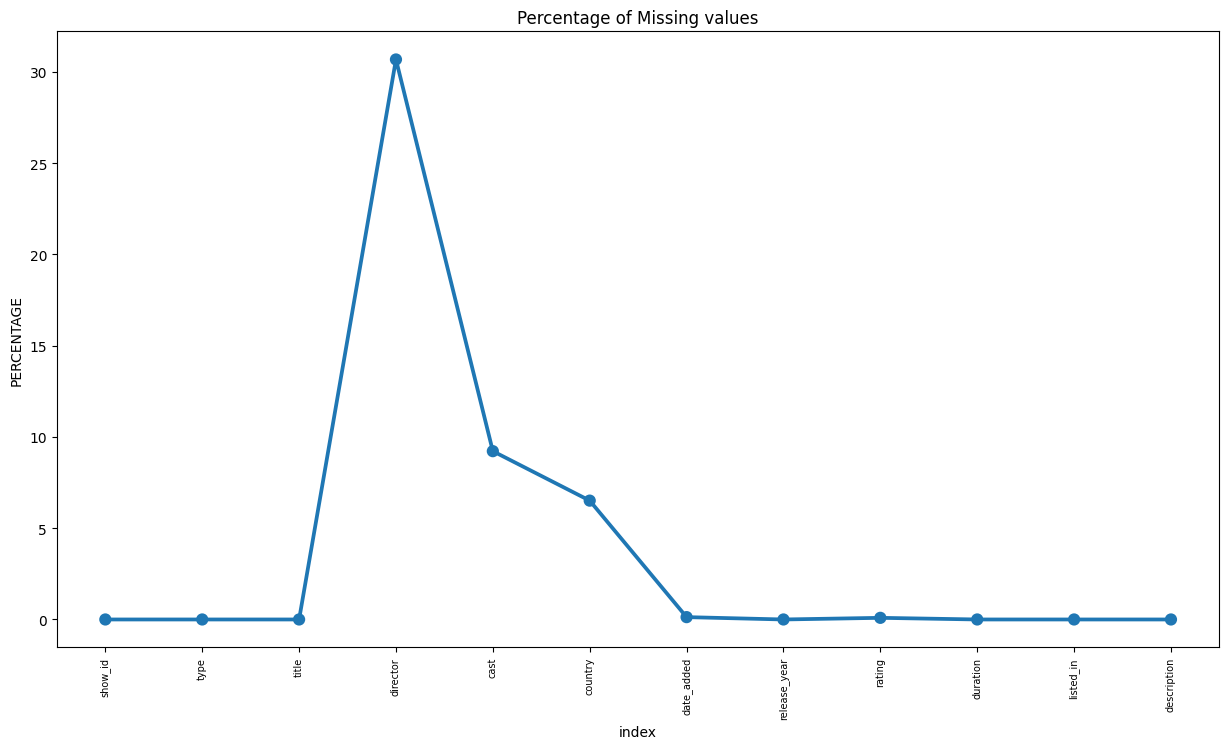

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize = (15,8))
ax = sns.pointplot(x = 'index',y = 0,data = missing)
plt.xticks(rotation = 90,fontsize = 7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### What did you know about your dataset?

The dataset is of Netflix Movies and Tv Shows. The dataset contains information Movies and Tv Shows with their respective Director, Cast, Country, Release Year, rating, Description etc.

Here are missing vallues listed below:
* director  = 2389
* cast = 718
* country = 507
* date_added = 10
* rating = 7

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"RaÃºl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

**1. show_id :** Unique ID of Movie / Tv Show

**2. type :** Movie / TV Show

**3. title :** Title of the Movie / Tv Show

**4. director :** Director of the Movie / Tv Show

**5. cast :** Actors in Movie / TV Show

**6. country :** Country of the Movie / TV Show Production

**7. date_added :** Date of listing on Netflix

**8. release_year :** Actual Releaseyear of the Movie / TV Show

**9. rating :** Age Rating of the Movie / TV Show

**10. duration :** Total Duration of Movie / TV Show in minutes

**11. listed_in :** Genere

**12. description:** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Create Copy of dataset
nf_df = df.copy()

In [ ]:
# Total Null/Missing Values
print(nf_df.isna().sum())
print('Total Null/Missing Values =', nf_df.isna().sum().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
Total Null/Missing Values = 3631


In [ ]:
# Handling Null/Missing Values
nf_df[['director','cast','country']] = nf_df[['director','cast','country']].fillna('Unknown')
nf_df['rating'] = nf_df['rating'].fillna(nf_df['rating'].mode()[0])
nf_df.dropna(axis=0, inplace = True)

In [ ]:
# Checking Null/Missing Values
print(nf_df.isna().sum())
print('Total Null/Missing Values =', nf_df.isna().sum().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
Total Null/Missing Values = 0


In [ ]:
# Typecasting 'date_added' from string to datetime
nf_df['date_added'] = pd.to_datetime(nf_df['date_added'], errors='coerce')

In [ ]:
# Adding new attributes month and year of date added
nf_df['month_added'] = nf_df['date_added'].dt.month
nf_df['year_added'] = nf_df['date_added'].dt.year

In [ ]:
# Dropping Date Added Column
nf_df.drop('date_added', axis=1, inplace=True)

In [ ]:
# Dataset Rows & Columns count
nf_df.shape

(7777, 13)

In [ ]:
# Dataset Info
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   release_year  7777 non-null   int64 
 7   rating        7777 non-null   object
 8   duration      7777 non-null   object
 9   listed_in     7777 non-null   object
 10  description   7777 non-null   object
 11  month_added   7777 non-null   int64 
 12  year_added    7777 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 850.6+ KB


In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
nf_df['country'] = nf_df['country'].apply(lambda x: x.split(',')[0])
nf_df['listed_in'] = nf_df['listed_in'].apply(lambda x: x.split(',')[0])
df.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# Splitting the duration column, and changing the datatype to integer
nf_df['duration'] = nf_df['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?

* Created two new columns 'month_added' & 'year_added'.
* Dropped 'date_added' column.
* Handeled Null/Missing Values
* Chose Primary Country and Listed in.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Movie & TV Show

Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

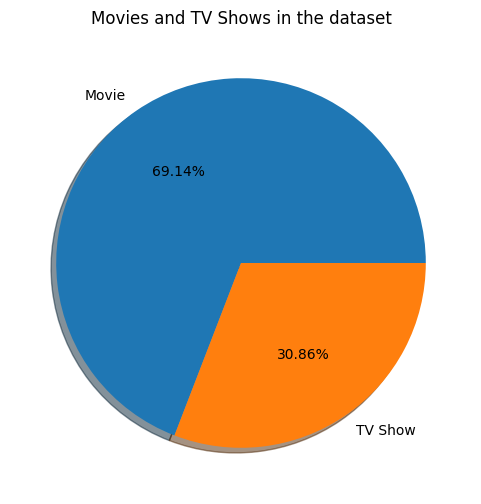

In [ ]:
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(6,6))
nf_df.type.value_counts().plot(kind='pie', shadow=True, autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

##### 1. Why did you pick the specific chart?

I chose Pie charts because it is commonly used to display data that can be easily represented in terms of percentages or proportions, where the values of each category add up to 100%.

##### 2. What is/are the insight(s) found from the chart?

Movies and TV Shows in the dataset
* Movies = 69.14%
* TV Shows = 30.86%

#### Directors

Text(0.5, 1.0, 'Top 10 directors by number of Movies/TV Show directed')

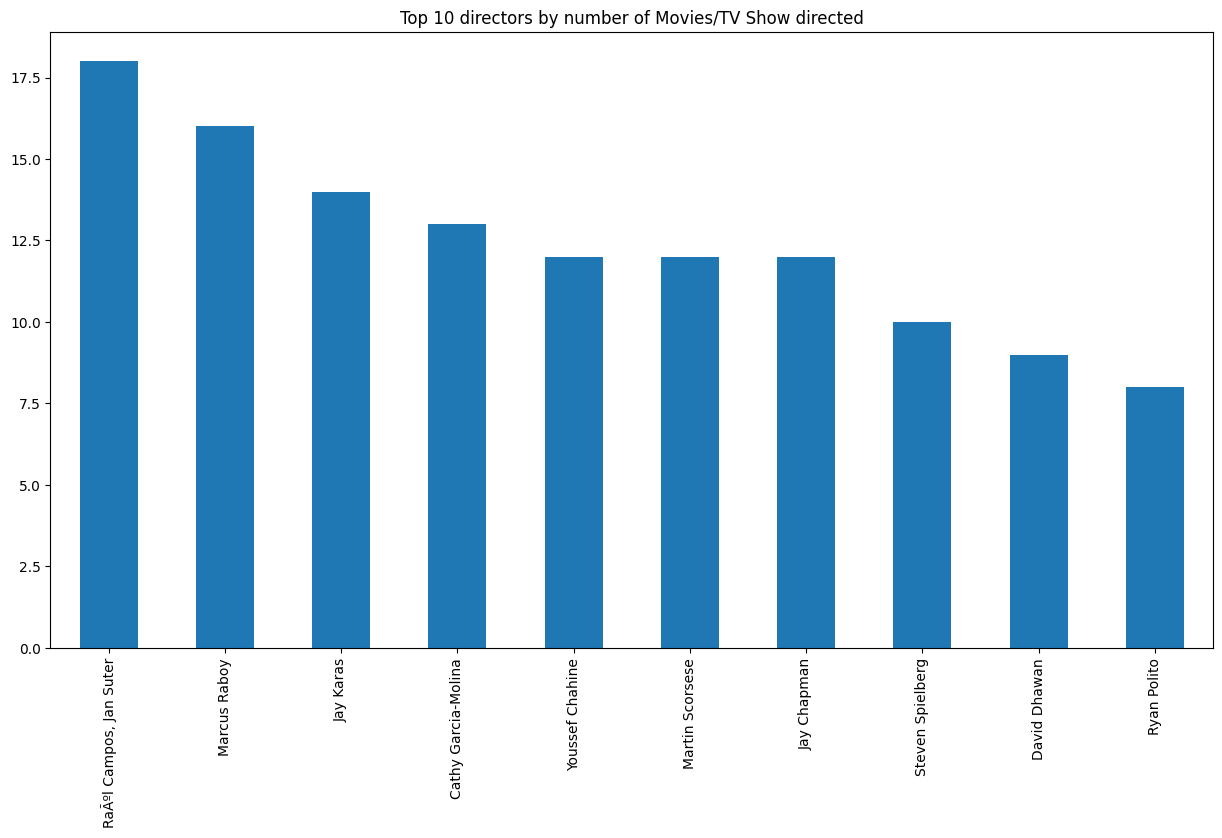

In [ ]:
# Top 10 directors by number of Movies/TV Shows directed in the dataset
plt.figure(figsize=(15,8))
nf_df[~(nf_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of Movies/TV Show directed')

##### 1. Why did you pick the specific chart?

Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 directors by number of Movies/TV Shows directed.**
1. RaÃºl Campos, Jan Suter = 18
2. Marcus Raboy = 16
3. Jay Karas = 14
4. Cathy Garcia-Molina = 13
5. Youssef Chahine = 12
6. Martin Scorsese = 12
7. Jay Chapman = 12
8. Steven Spielberg = 10
9. David Dhawan = 9
10. Ryan Polito = 8

#### Cast

Text(0.5, 1.0, 'Top Actors in Movies')

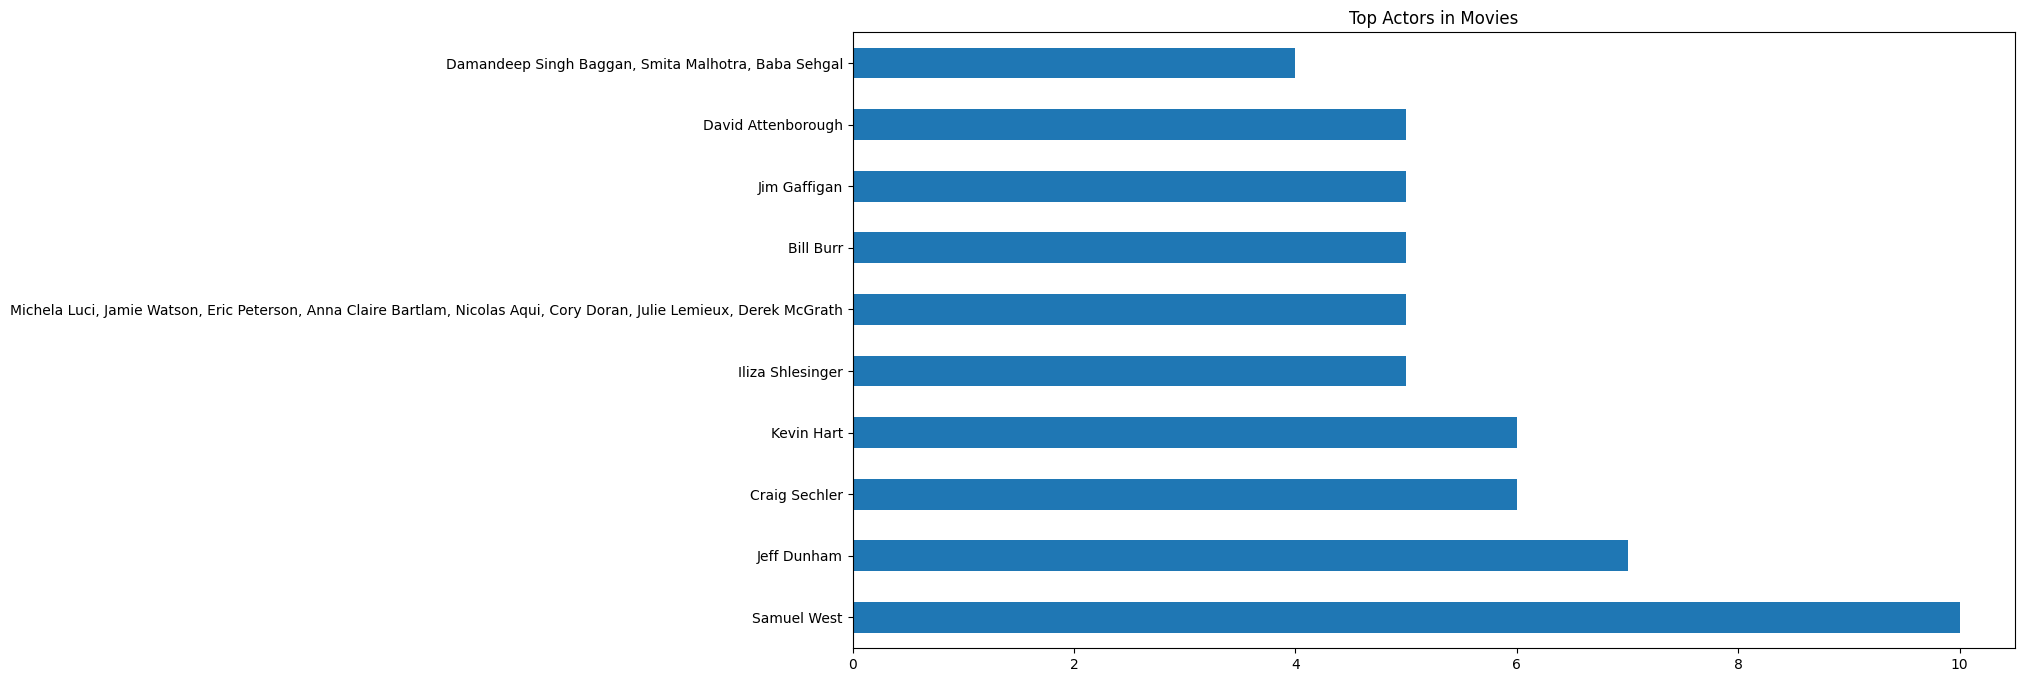

In [ ]:
# Top Actors in Movies
plt.figure(figsize=(15,8))
nf_df[~(nf_df['cast']=='Unknown')&(nf_df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top Actors in Movies')

Text(0.5, 1.0, 'Top Actors in TV Shows')

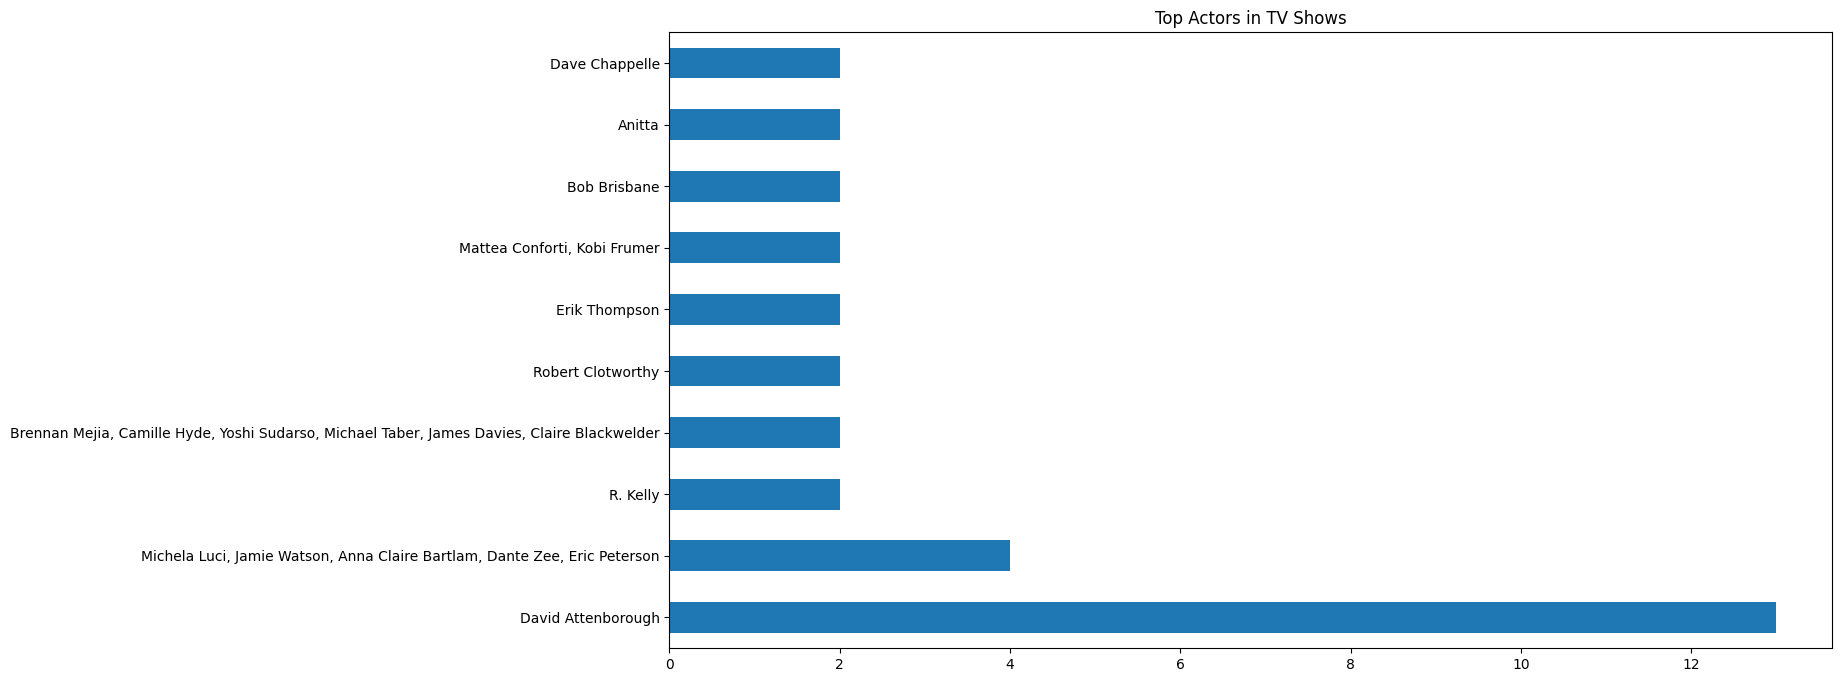

In [ ]:
# Top Actors in TV Shows
plt.figure(figsize=(15,8))
nf_df[~(nf_df['cast']=='Unknown')&(nf_df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top Actors in TV Shows')

##### 1. Why did you pick the specific chart?

A horizontal bar plot is a graphical representation of data where rectangular bars are used to display quantitative information. The length of each bar is proportional to the value it represents. This type of plot is ideal for comparing data between different categories, where one axis shows the specific categories being compared, while the other axis represents a measured value.

##### 2. What is/are the insight(s) found from the chart?

**Movies**
This graph displays the top actors in movies, with Samuel West ranking first, Jeff Dunham ranking second, and Craig Sechler and Kevin Hart ranking third and fourth, respectively.

**TV Shows**
This graph displays the top actors in TV Shows, with David Attenborough ranking first, following with Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

#### Countries

Text(0.5, 1.0, 'Top 10 countries with the highest number of Movies/TV Show')

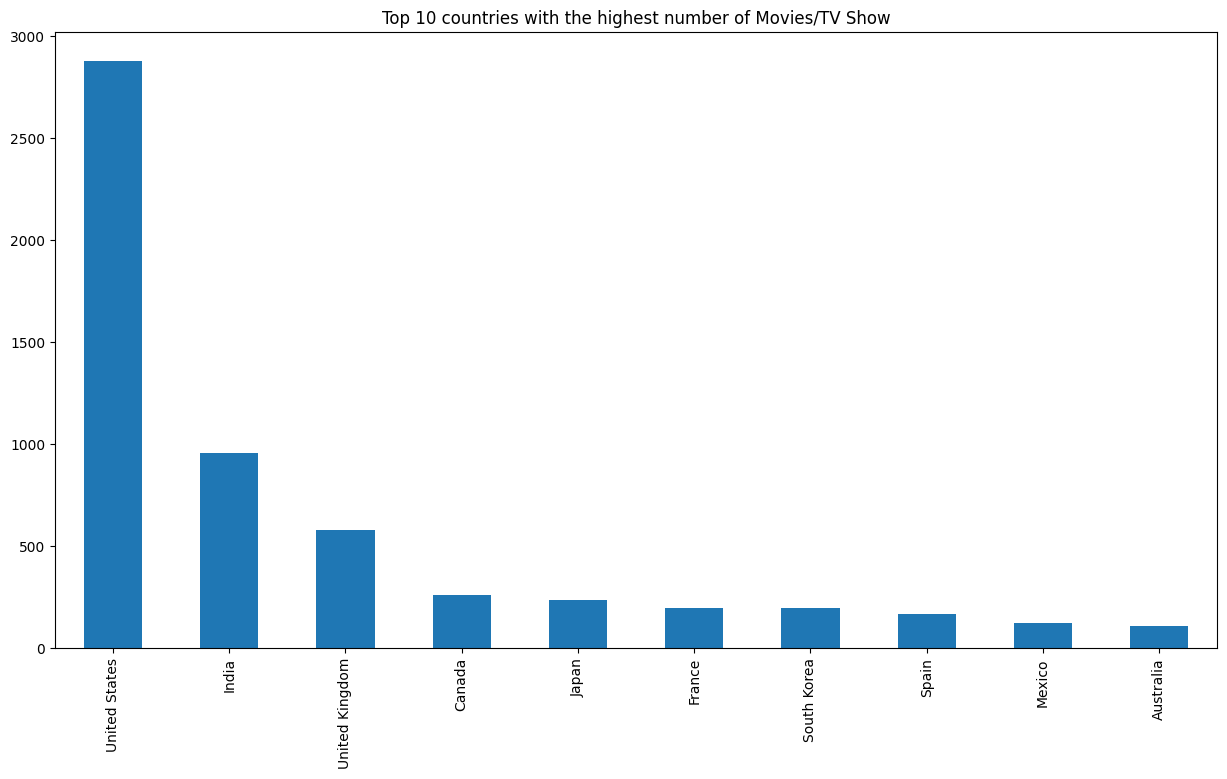

In [ ]:
# Top 10 countries with the highest number Movies/TV shows in the dataset
plt.figure(figsize=(15,8))
nf_df[~(nf_df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 countries with the highest number of Movies/TV Show')

##### 1. Why did you pick the specific chart?

Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

**Top 10 countries with the highest number of Movies/TV Show**
1. United States = 2549
2. India = 923
3. United Kingdom = 396
4. Japan = 225
5. South Korea = 183
6. Canada = 177
7. Spain = 134
8. France = 115
9. Egypt = 101
10. Turkey = 100



#### Release Year

Text(0.5, 0, 'Release Year')

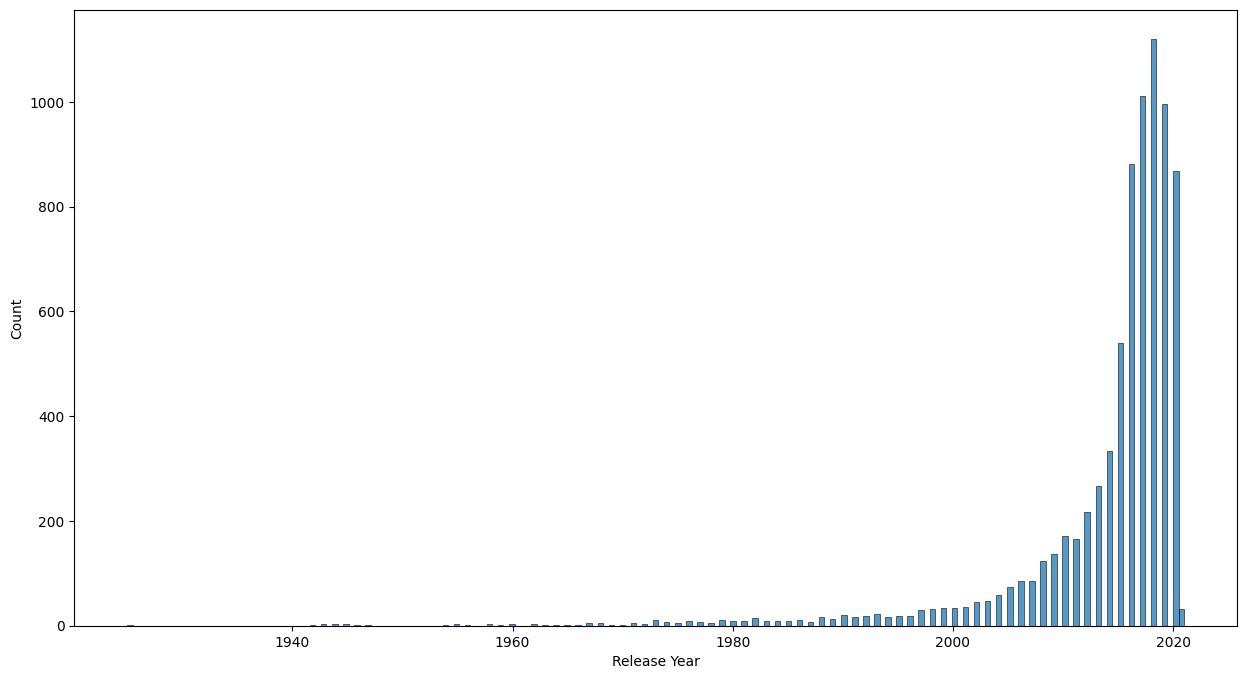

In [ ]:
# Visualizing the Release Year of the Movies/TV Shows
plt.figure(figsize=(15,8))
sns.histplot(nf_df['release_year'])
plt.xlabel('Release Year')


##### 1. Why did you pick the specific chart?

Histograms are commonly used to compare the distribution of numerical data in different intervals or ranges. By displaying data in intervals, histograms allow audiences to easily identify important patterns and meanings related to large datasets. Therefore, histogram examples can effectively help people visualize and understand large amounts of data quickly and easily.

##### 2. What is/are the insight(s) found from the chart?

There is a major hike in Release Year of Movies/TV Shows after year 2000.

#### Movies Duration

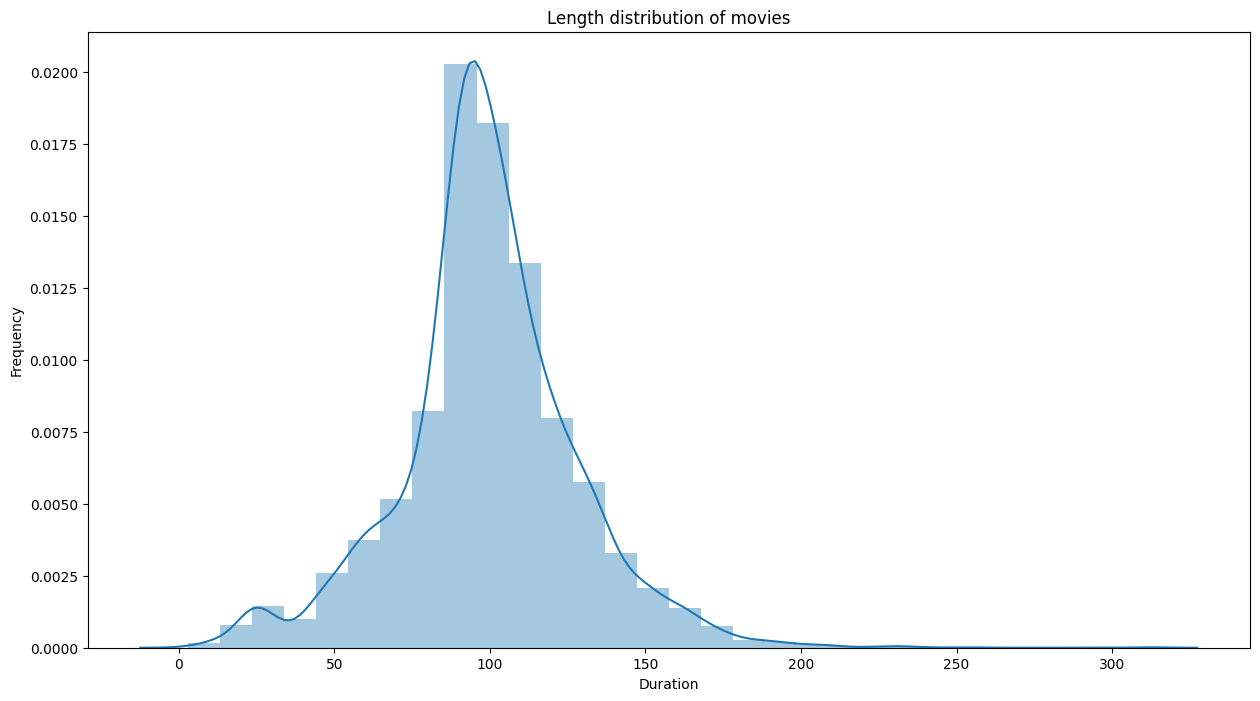

In [ ]:
# Creating new dataframe for Movies
movies_df = nf_df[nf_df['type']=='Movie']

# Length Distribution of Movies
plt.figure(figsize=(15,8))
sns.distplot(movies_df['duration'], bins=30)
plt.title('Length distribution of movies')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

The distplot shows the distribution of univariate data, i.e., the distribution of a single variable against its density. The function takes the data variable as an input and generates a plot with the density distribution.

##### 2. What is/are the insight(s) found from the chart?

This plot shows the distribution of movie durations. We can observe that the number of movies with durations between 0 and 100 minutes is increasing, while the number of movies with durations between 100 and 200 minutes is decreasing.

#### Rating

In [ ]:
# Ratings of Movies/TV Shows in the dataset
nf_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

<Axes: xlabel='rating', ylabel='count'>

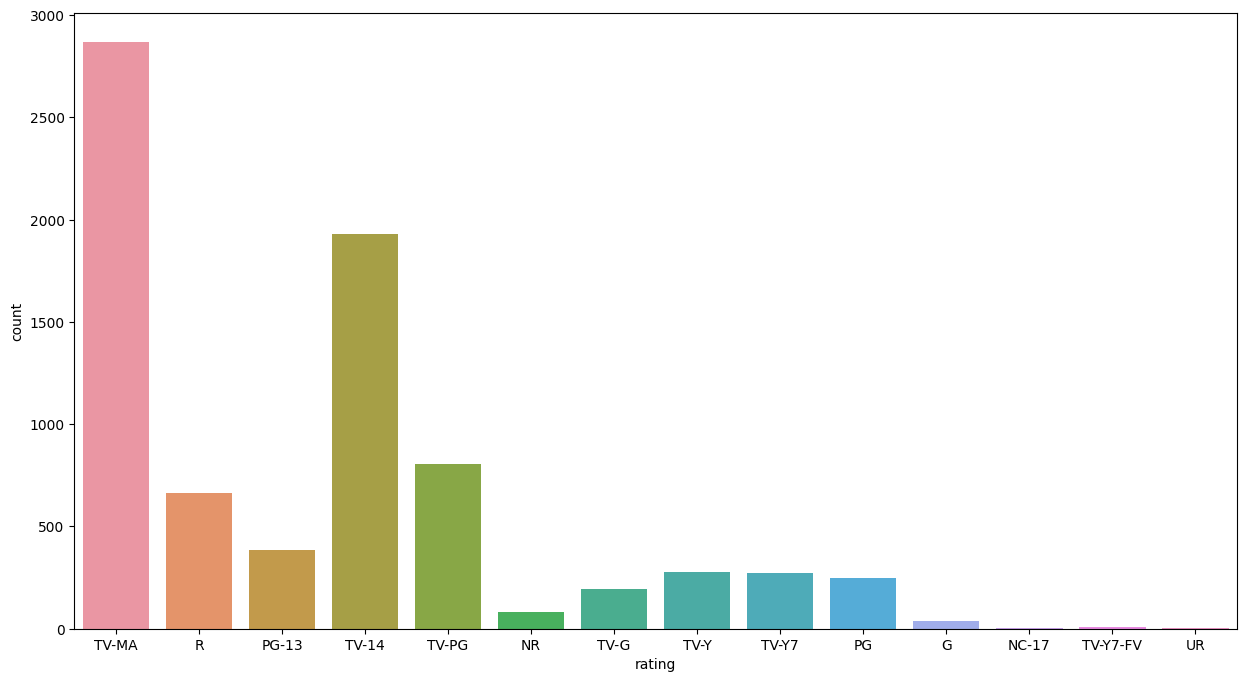

In [ ]:
# Visualizing Ratings of Movies/TV Shows in the dataset
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=nf_df)

In [ ]:
# Changing the values in the rating column
rating = {'TV-MA':'Adults',
          'R':'Adults',
          'PG-13':'Teens',
          'TV-14':'Older Teens',
          'TV-PG':'Older Kids',
          'NR':'Adults',
          'TV-G':'Kids',
          'TV-Y':'Kids',
          'TV-Y7':'Older Kids',
          'PG':'Older Kids',
          'G':'Kids',
          'NC-17':'Adults',
          'TV-Y7-FV':'Older Kids',
          'UR':'Adults'}

nf_df['rating'].replace(rating, inplace = True)
nf_df['rating'].unique()

array(['Adults', 'Teens', 'Older Teens', 'Older Kids', 'Kids'],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

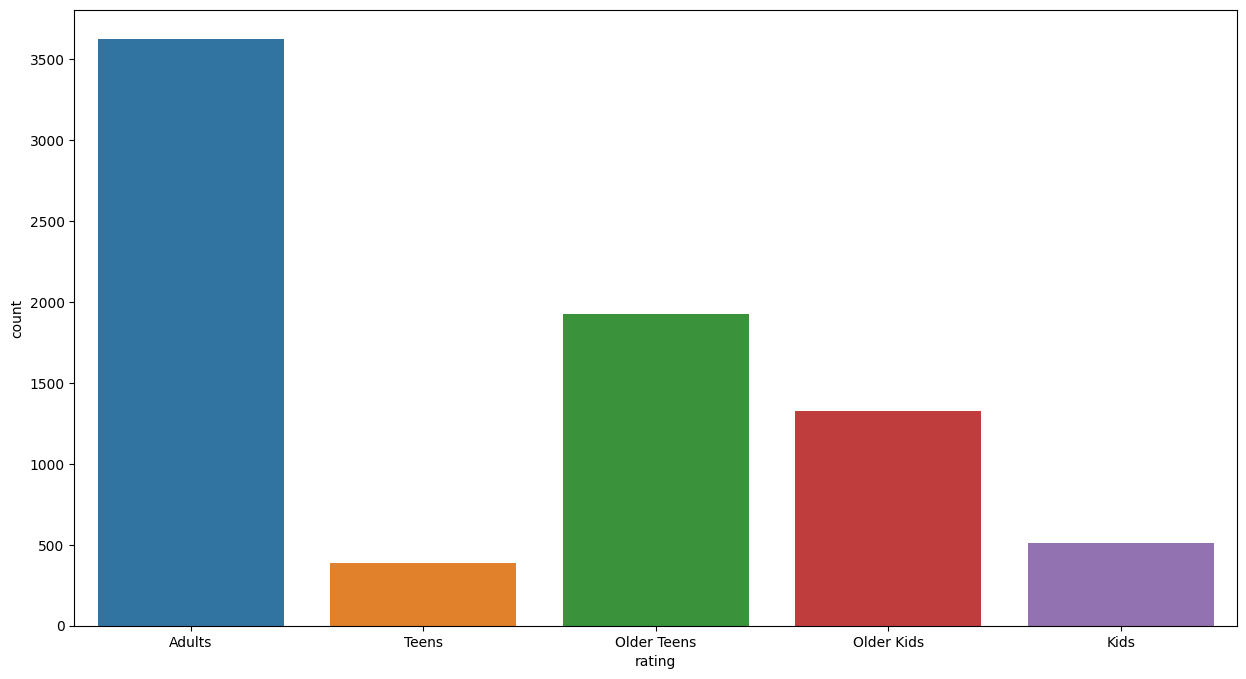

In [ ]:
# Visualizing Age Ratings of Movies/TV Shows in the dataset
plt.figure(figsize=(15,8))
sns.countplot(x='rating',data=nf_df)

In [ ]:
# Extract principal country from 'country' column using split() method
nf_df['principal_country'] = nf_df['country'].apply(lambda x: x.split(",")[0])

# Get top 10 principal countries by frequency
country_order = nf_df.loc[nf_df['principal_country']!= 'Unknown', 'principal_country'].value_counts()[:9].index
age_order = ['Adults','Older Teens', 'Teens', 'Older Kids', 'Kids']
print(country_order)
print(age_order)

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France',
       'South Korea', 'Spain', 'Mexico'],
      dtype='object')
['Adults', 'Older Teens', 'Teens', 'Older Kids', 'Kids']


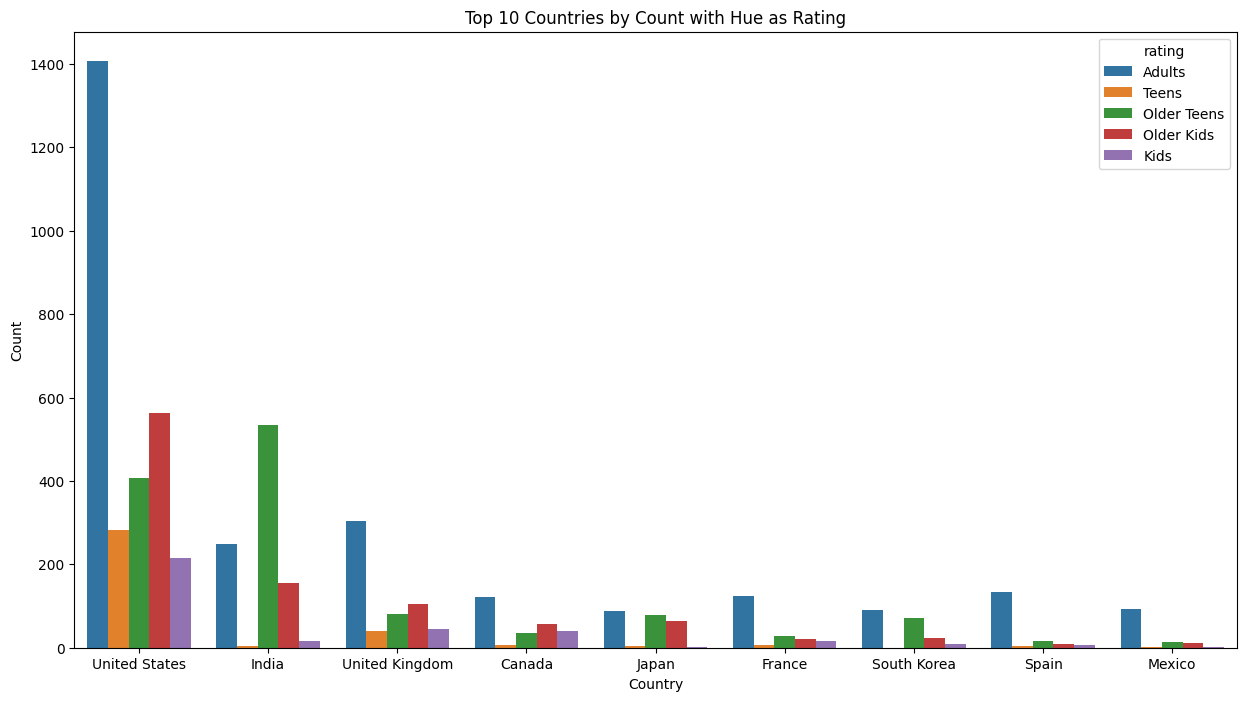

In [ ]:
# Create the countplot
plt.figure(figsize=(15,8))
sns.countplot(x='country', hue='rating', data=nf_df[nf_df['country'].isin(country_order)], order=country_order)
plt.title('Top 10 Countries by Count with Hue as Rating')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Count plots are particularly helpful when we want to compare the frequencies of different categories across multiple groups or when we want to visualize the frequency distribution of multiple categorical columns in a single plot.

##### 2. What is/are the insight(s) found from the chart?

From above charts we can see that Adult rated movies has most count than other rated movies.

#### Listed In (Genres)

Text(0.5, 1.0, 'Top 10 Genres')

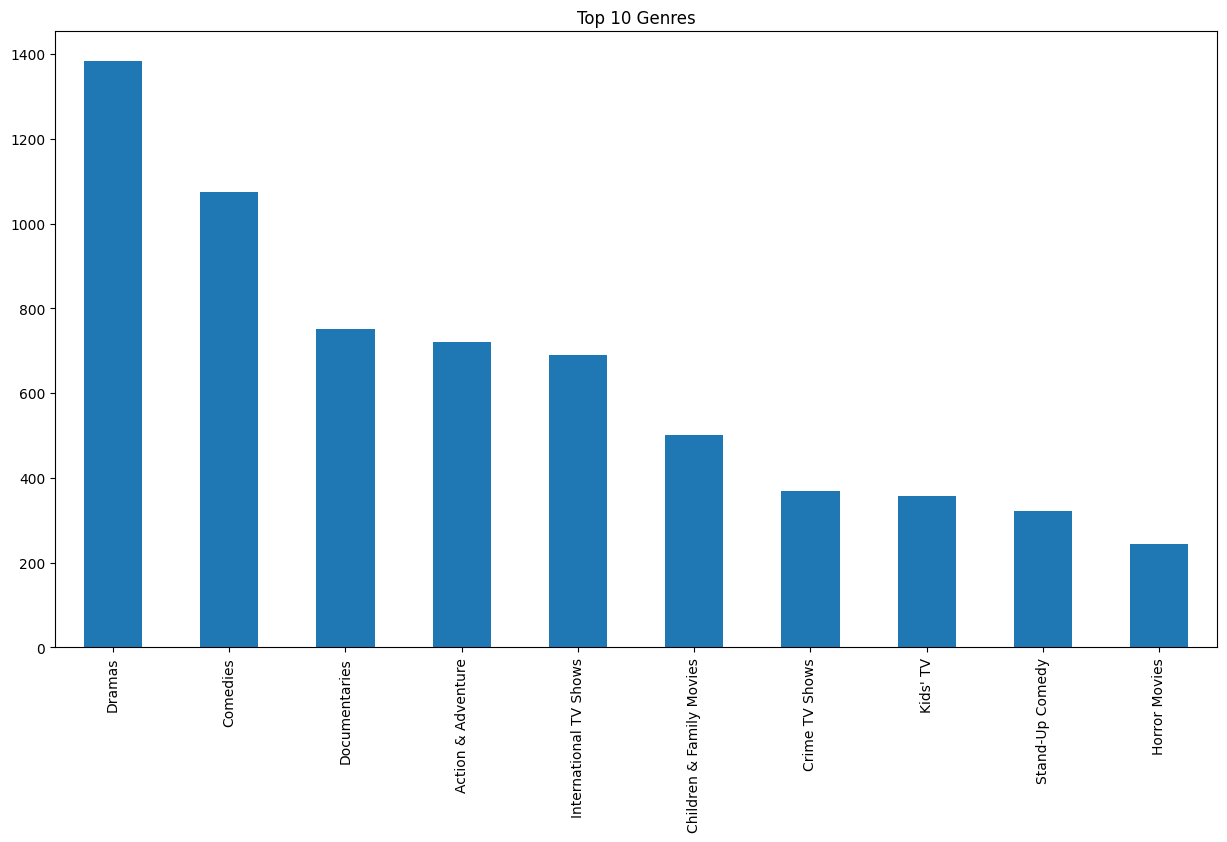

In [ ]:
# Top 10 genres
plt.figure(figsize=(15,8))
nf_df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Genres')

Text(0.5, 1.0, 'Top 10 Genres of Movies')

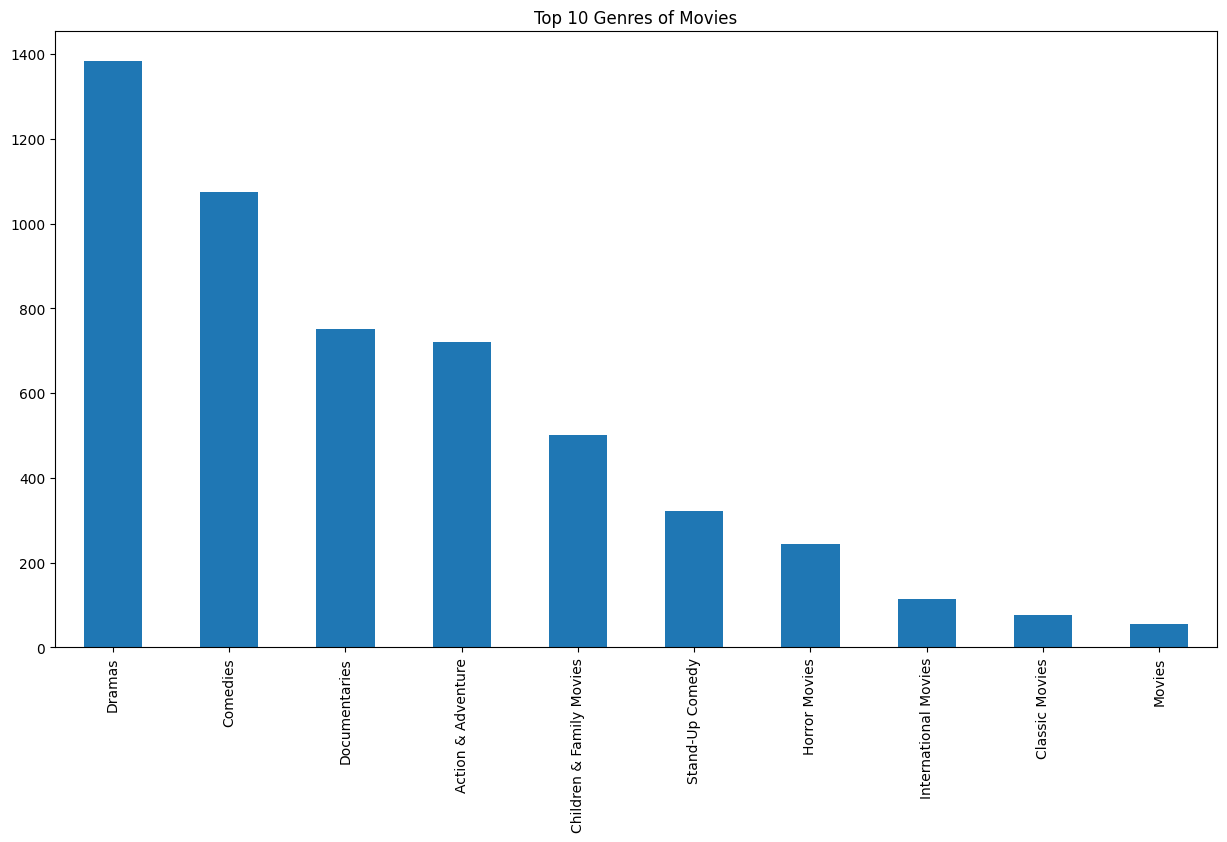

In [ ]:
# Top 10 genres of Movies
plt.figure(figsize=(15,8))
nf_df[nf_df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Genres of Movies')

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

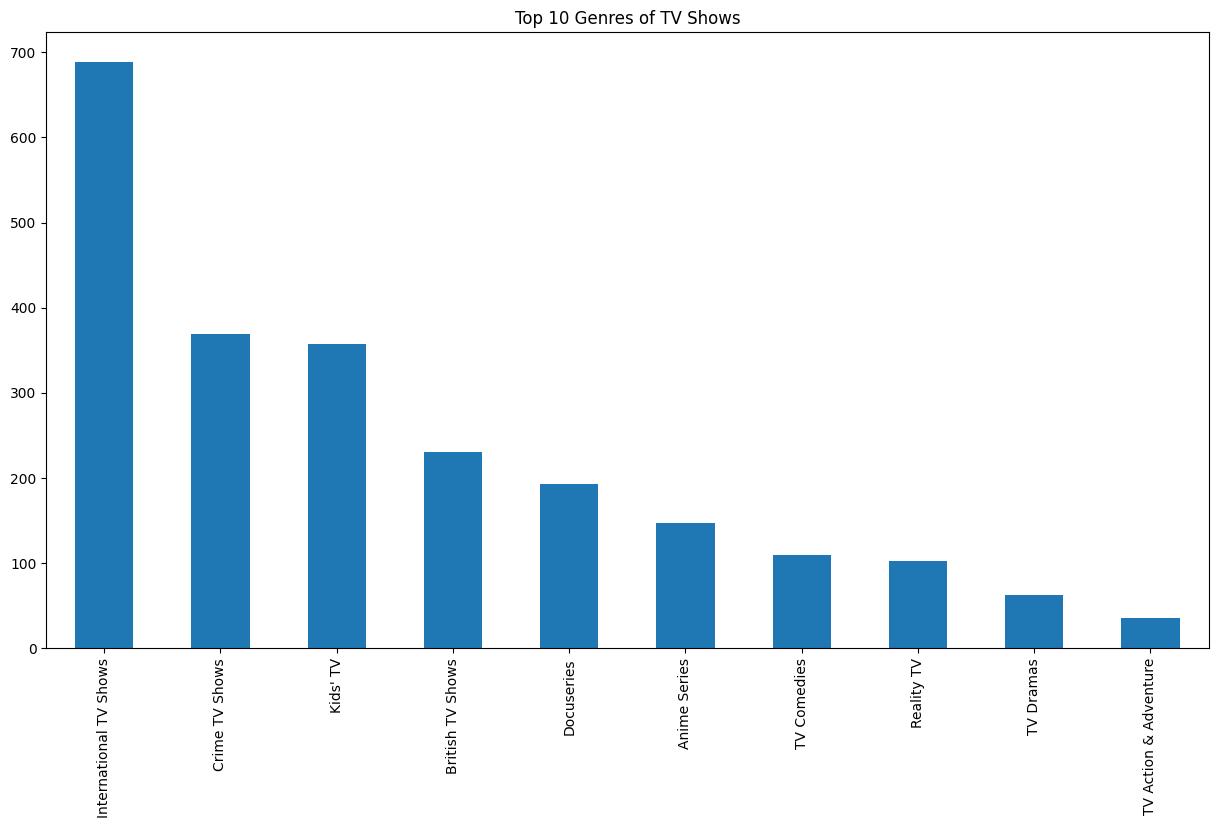

In [ ]:
# Top 10 genres of TV Shows
plt.figure(figsize=(15,8))
nf_df[nf_df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Genres of TV Shows')

##### 1. Why did you pick the specific chart?

Barplot is easy to visualize and compare categorical data or the distribution of a categorical variable.

##### 2. What is/are the insight(s) found from the chart?

The graphs shows the top 10 genres.
**Top 3 in All Over Data**
* Drama
* Comedies
* Documentries

**Top 3 in Movies**
* Drama
* Comedies
* Documentries

**Top 3 in TV Shows**
* International TV Shows
* Crime TV Shows
* Kid's TV

#### Month Added

Text(0.5, 0, 'Month')

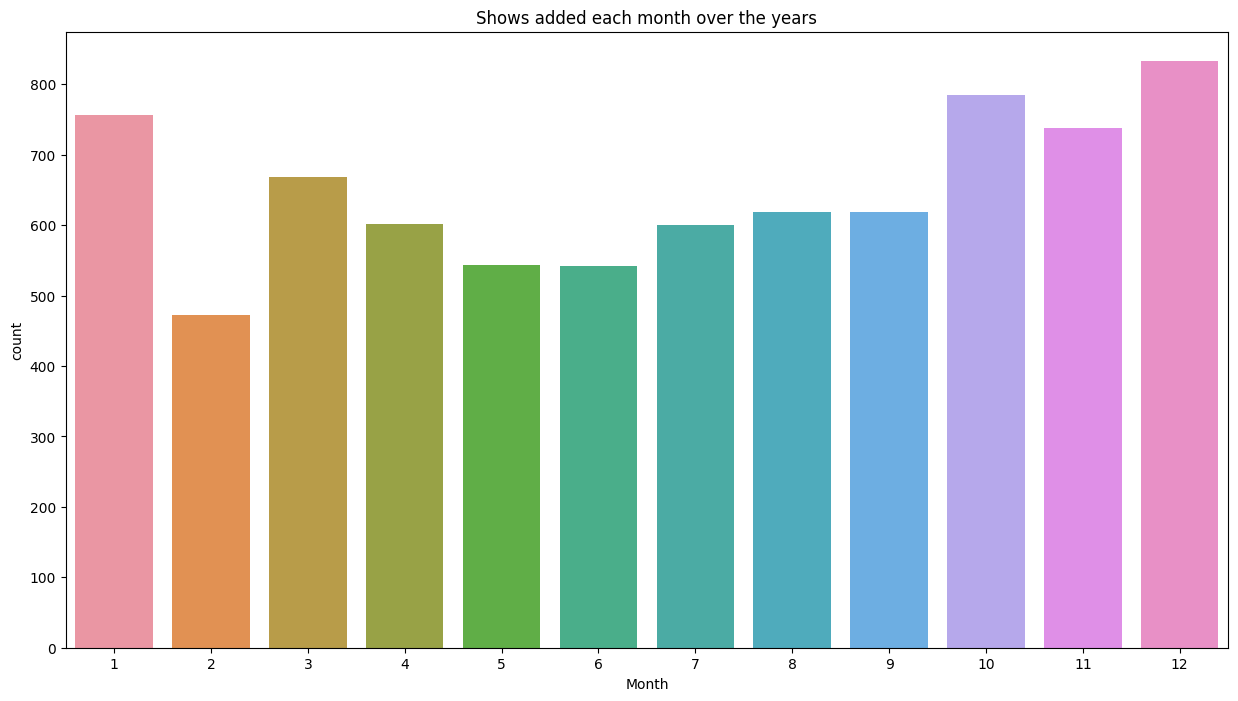

In [ ]:
# Number of shows added on different months
plt.figure(figsize = (15,8)) 
sns.countplot(x='month_added', data=nf_df)
plt.title('Shows added each month over the years')
plt.xlabel('Month')

##### 1. Why did you pick the specific chart?

Count plots are particularly helpful when we want to compare the frequencies of different categories across multiple groups or when we want to visualize the frequency distribution of multiple categorical columns in a single plot.

##### 2. What is/are the insight(s) found from the chart?

The highest number of shows added are in December, followed by October. There is a minor difference in the number of shows added among the other months.

#### Year Added

Text(0.5, 0, 'Year')

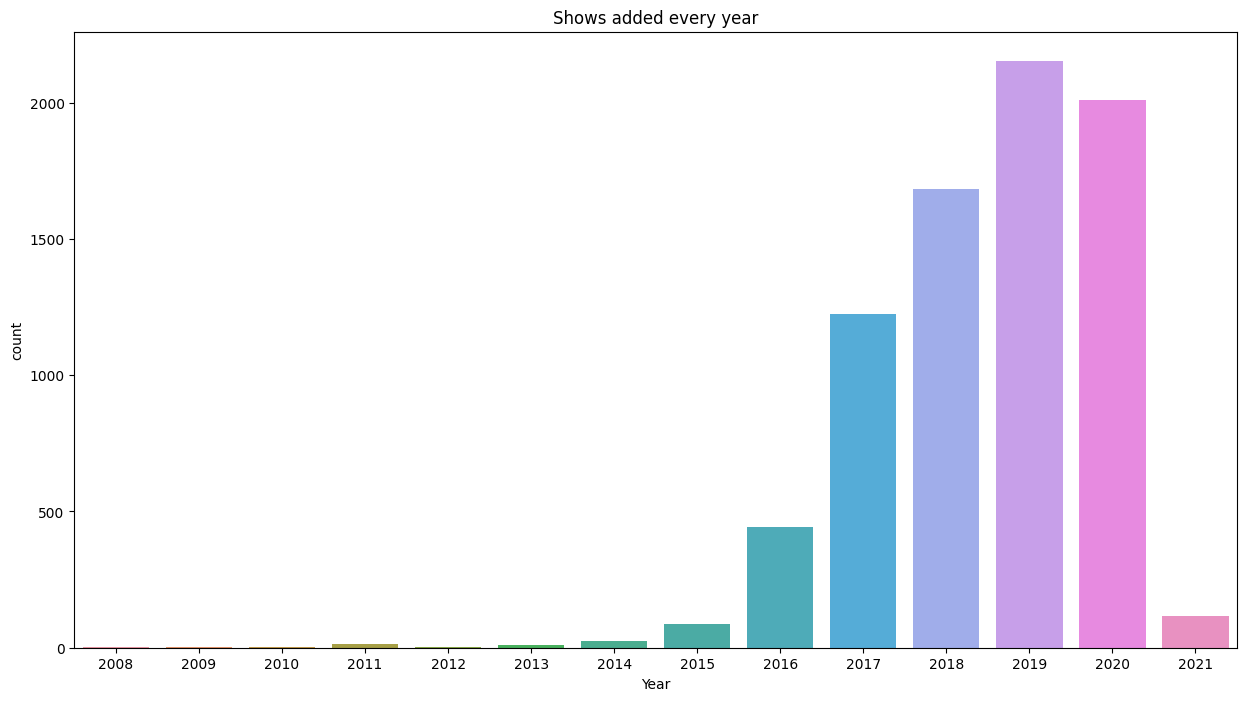

In [ ]:
# Number of shows added on different Years
plt.figure(figsize = (15,8)) 
sns.countplot(x='year_added', data=nf_df)
plt.title('Shows added every year')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Count plots are particularly helpful when we want to compare the frequencies of different categories across multiple groups or when we want to visualize the frequency distribution of multiple categorical columns in a single plot.

##### 2. What is/are the insight(s) found from the chart?

The year 2019 has the highest number of added shows, followed by the year 2020 with the second-highest number of added shows, and finally, the year 2018 has the third-highest number of added shows.

#### Biovariate Analysis

##### Movies & TV Shows added over the Years

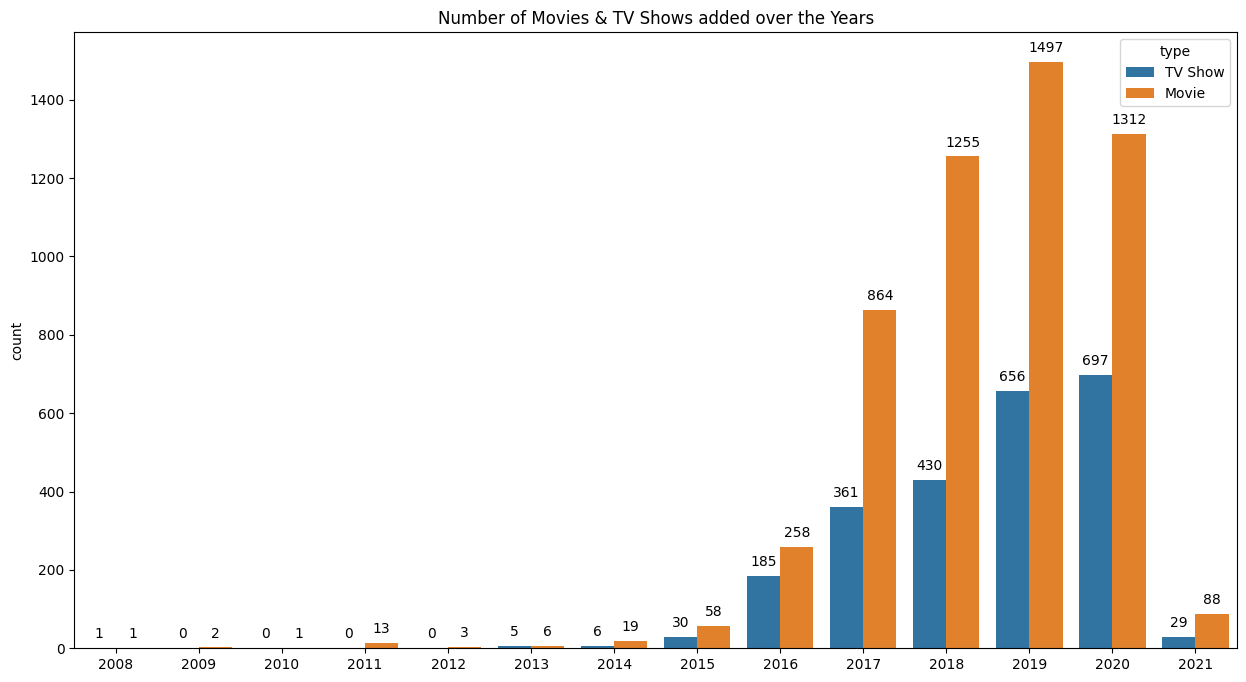

In [ ]:
# Number of Movies & TV Shows added over the Years
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='year_added',data=nf_df, hue='type', ax=ax)
ax.set_title('Number of Movies & TV Shows added over the Years')
ax.set_xlabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

###### 1. Why did you pick the specific chart?

A bivariate countplot is a graph that illustrates the connection between two variables measured on a single group of individuals. This type of plot allows you to quickly identify the extent and nature of the correlation between the two variables.

###### 2. What is/are the insight(s) found from the chart?

The graph shows the total number of movies and TV shows added each year. The year 2019 had the highest number of additions with 1497 movies and 656 TV shows. In the year 2020, there were 1312 movies and 697 TV shows added, making it the second-highest year. The year 2018 had a total of 1255 movies and 430 TV shows added.

##### Movies & TV Shows released since 2008

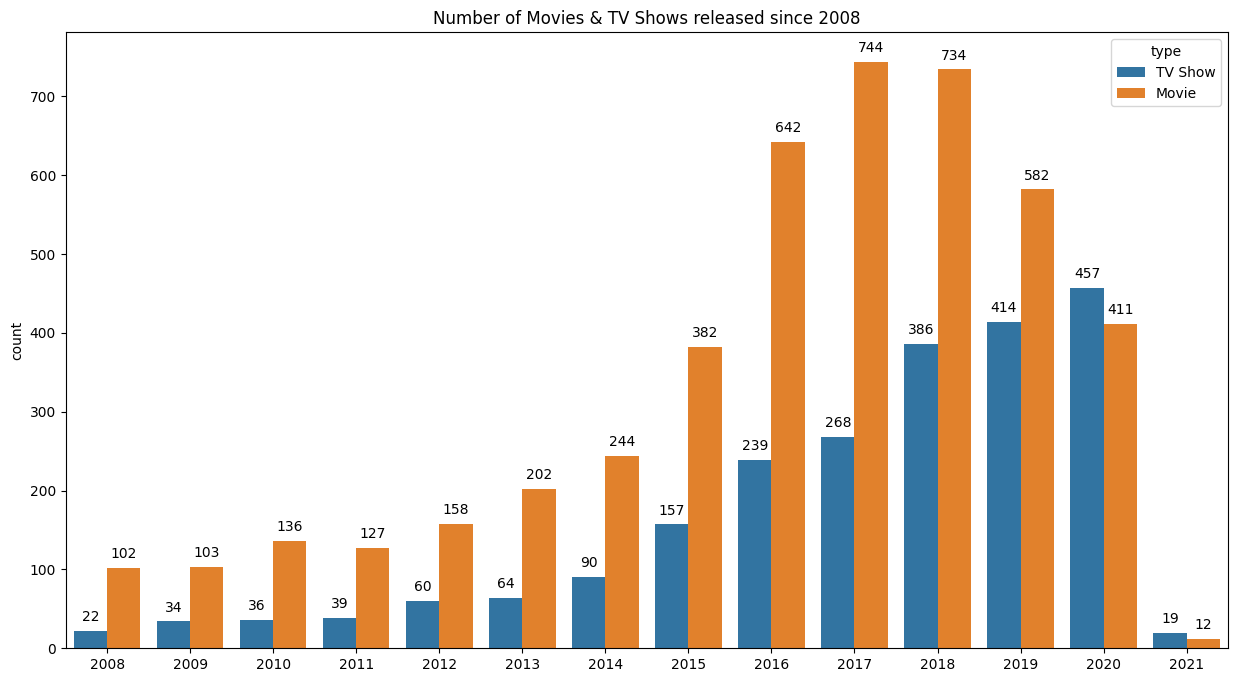

In [ ]:
# Number of Movies & TV Shows released since 2008
year_range = range(2008,2022)
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='release_year',data=nf_df, hue='type', order=year_range)
ax.set_title('Number of Movies & TV Shows released since 2008')
ax.set_xlabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

###### 1. Why did you pick the specific chart?

A bivariate plot is a graph that illustrates the connection between two variables measured on a single group of individuals. This type of plot allows you to quickly identify the extent and nature of the correlation between the two variables.

###### 2. What is/are the insight(s) found from the chart?

This graph depicts the number of shows released on Netflix each year since 2008. Prior to 2019, movies had the highest number of releases. However, in 2020 and 2021, TV shows had the highest number of releases.

#### Seasons in TV Shows

In [ ]:
# Number of Seasons in TV Shows
nf_df[nf_df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

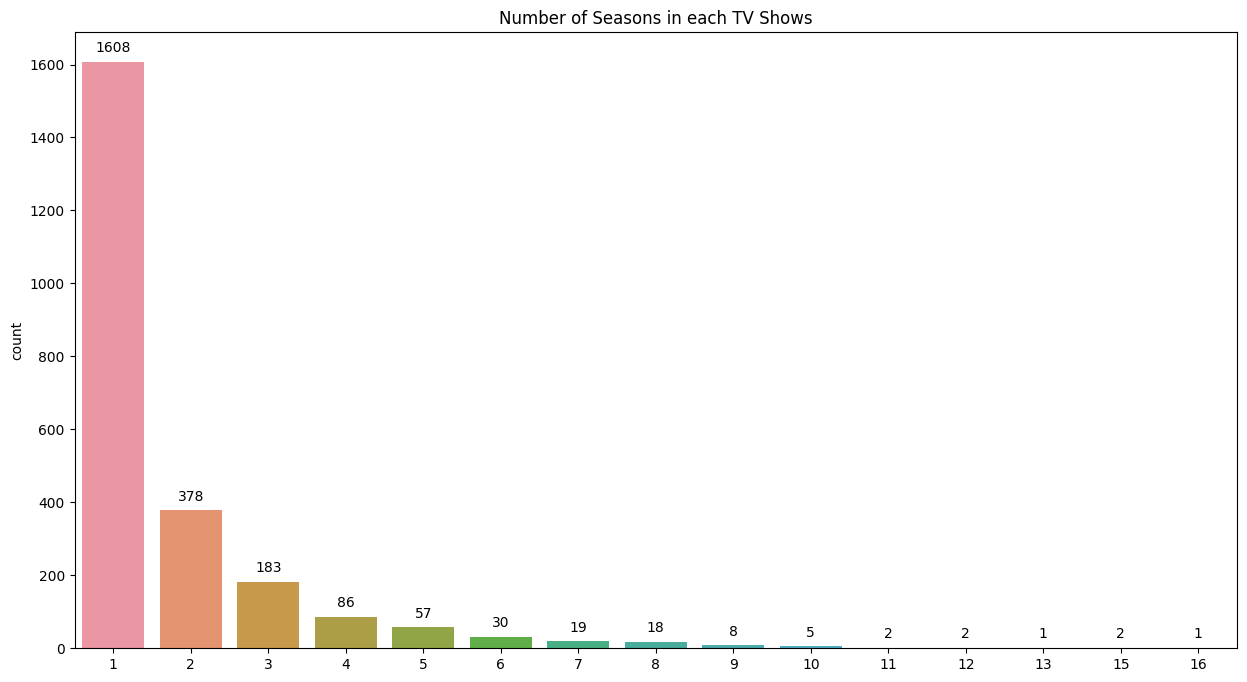

In [ ]:
# Seasons in each TV Shows
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='duration',data=nf_df[nf_df['type']=='TV Show'])
ax.set_title('Number of Seasons in each TV Shows')
ax.set_xlabel('')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

##### 1. Why did you pick the specific chart?

Count plots are particularly helpful when we want to compare the frequencies of different categories across multiple groups or when we want to visualize the frequency distribution of multiple categorical columns in a single plot.

##### 2. What is/are the insight(s) found from the chart?

This graph displays the count of TV shows based on the number of seasons they have. The count for TV shows with one season is 1608, while for those with two seasons it is 378, and for those with three seasons it is 183.

#### Stopwords

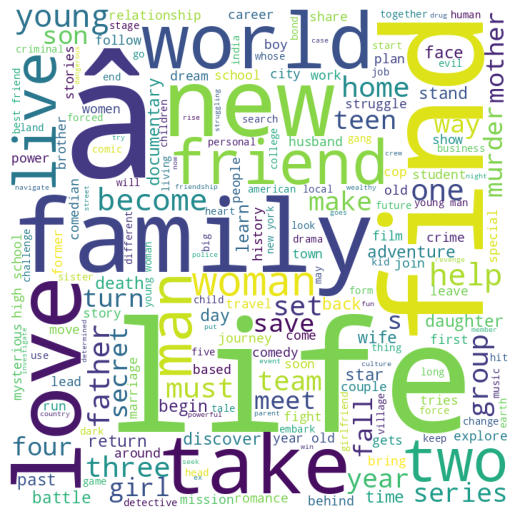

In [ ]:
# Building a wordcloud for the movie descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for desc in nf_df['description'].astype(str).values:
    
    # split the description into words
    words = desc.lower().split()

    # add the words to comment_words
    comment_words += " ".join(words) + " "

# create the WordCloud object
wordcloud = WordCloud(width=700, height=700,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

##### 1. Why did you pick the specific chart?

Word clouds or tag clouds are visual displays of word frequency in a given text. They highlight the most commonly occurring words by presenting them in a larger font size, while the less frequent words appear in smaller sizes.

##### 2. What is/are the insight(s) found from the chart?

In above plot we can see words "life, find, family, love, world, friend, take, woman appear many times.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Group by principal country and type of content (Movie/TV Show), then unstack and select top 10 principal countries
content_data = nf_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]

# Compute the sum of Movie and TV Show counts for each country
content_data['sum'] = content_data.sum(axis=1)

# Compute the ratio of Movie and TV Show counts for each country, sort by Movie ratio in ascending order, and select only the 'Movie' and 'TV Show' columns
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]


In [ ]:
nf_df['count'] = 1
data = nf_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']

heatmap_df = nf_df.loc[nf_df['principal_country'].isin(data)]
heatmap_df = pd.crosstab(heatmap_df['principal_country'], heatmap_df['rating'],normalize = "index").T
heatmap_df

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Older Teens,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929


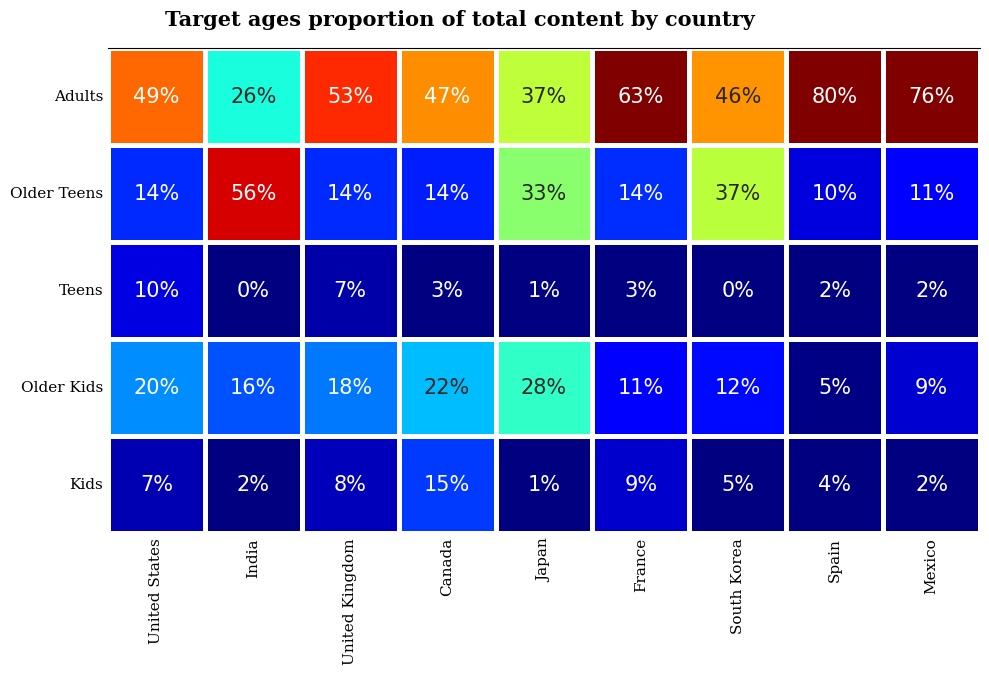

In [ ]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(heatmap_df.loc[age_order,country_order],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table that displays correlation coefficients between variables. Each cell in the table represents the correlation between two variables, and the range of correlation is [-1,1]. A correlation matrix is used for summarizing data, as input for advanced analyses, and as a diagnostic tool for advanced analyses.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap graph depicts the proportion of total content targeted at specific age groups in different countries.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
nf_df.fillna('',inplace=True)

In [ ]:
print(nf_df.isna().sum())

show_id              0
type                 0
title                0
director             0
cast                 0
country              0
release_year         0
rating               0
duration             0
listed_in            0
description          0
month_added          0
year_added           0
principal_country    0
count                0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

No Missing Values.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Combining all Attributes

In [ ]:
# Combining all the clustering attributes into a single column

nf_df['clustering'] = (nf_df['director'] + ' ' + 
                       nf_df['cast'] +' ' +
                       nf_df['country'] +' ' +
                       nf_df['listed_in'] +' ' +
                       nf_df['description'])

#### 2. Removing Punctuations

In [ ]:
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
nf_df['clustering'] = nf_df['clustering'].apply(remove_punctuation)
nf_df['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

#### 3. Removing Stopwords

In [ ]:
# Extracting and displaying the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def remove_stopwords(text):
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
nf_df['clustering'] = nf_df['clustering'].apply(remove_stopwords)

Remove White spaces
nf_df = nf_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#### 4. Removing non-ASCII characters

In [ ]:
# function to remove non-ascii characters
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# Removing non-ascii characters
nf_df['clustering'] = remove_non_ascii(nf_df['clustering'])

#### 6. Removing Lemmatization

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
# Lemmatization
nf_df['clustering'] = lemmatize_verbs(nf_df['clustering'])

#### 5. Tokenization

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()
nf_df['clustering'] = nf_df['clustering'].apply(lambda x: tokenizer.tokenize(x))

#### 6. Text Vectorization

In [ ]:
# Vectorizing Text
clustering_vectorization = nf_df['clustering']

In [ ]:
# Using TFIDF vectorizer
def tokenizer(text):
  return text

tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

### 3. Dimesionality Reduction

In [ ]:
# Converting X into array form for clustering
X = x.toarray()

In [ ]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=4000, random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

Text(0, 0.5, 'Cumulative Explained Variance')

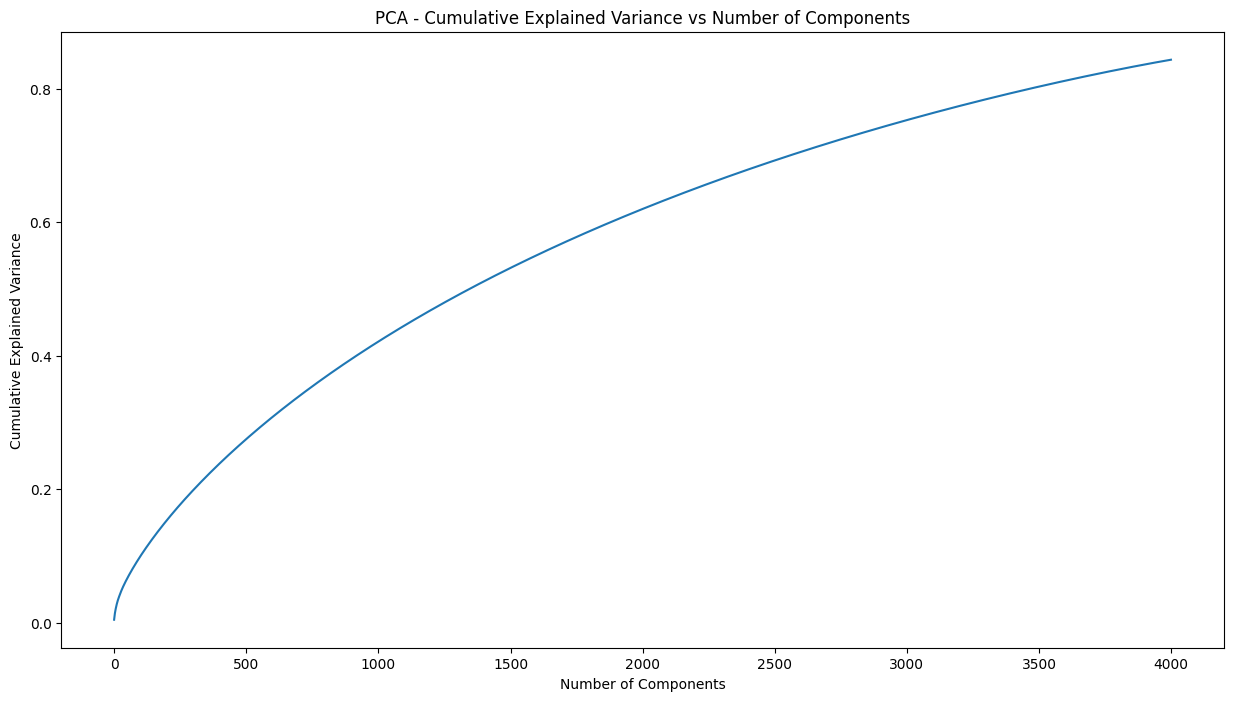

In [ ]:
# Explained Variance vs Number of Components
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
# Transformed features
X_pca = pca.transform(X)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### K-Means Clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**K-means clustering** is a popular unsupervised machine learning algorithm used for partitioning data points into distinct clusters. It aims to group similar data points together while minimizing the within-cluster variance. The algorithm starts by randomly initializing cluster centroids and iteratively assigns each data point to the nearest centroid. It then updates the centroids based on the assigned data points, repeating this process until convergence. The result is a set of cluster centroids representing the centers of each cluster and a clustering assignment for each data point. K-means is efficient, easy to implement, and widely used in various domains for tasks such as customer segmentation, image compression, and anomaly detection.

Text(0, 0.5, 'WCSS')

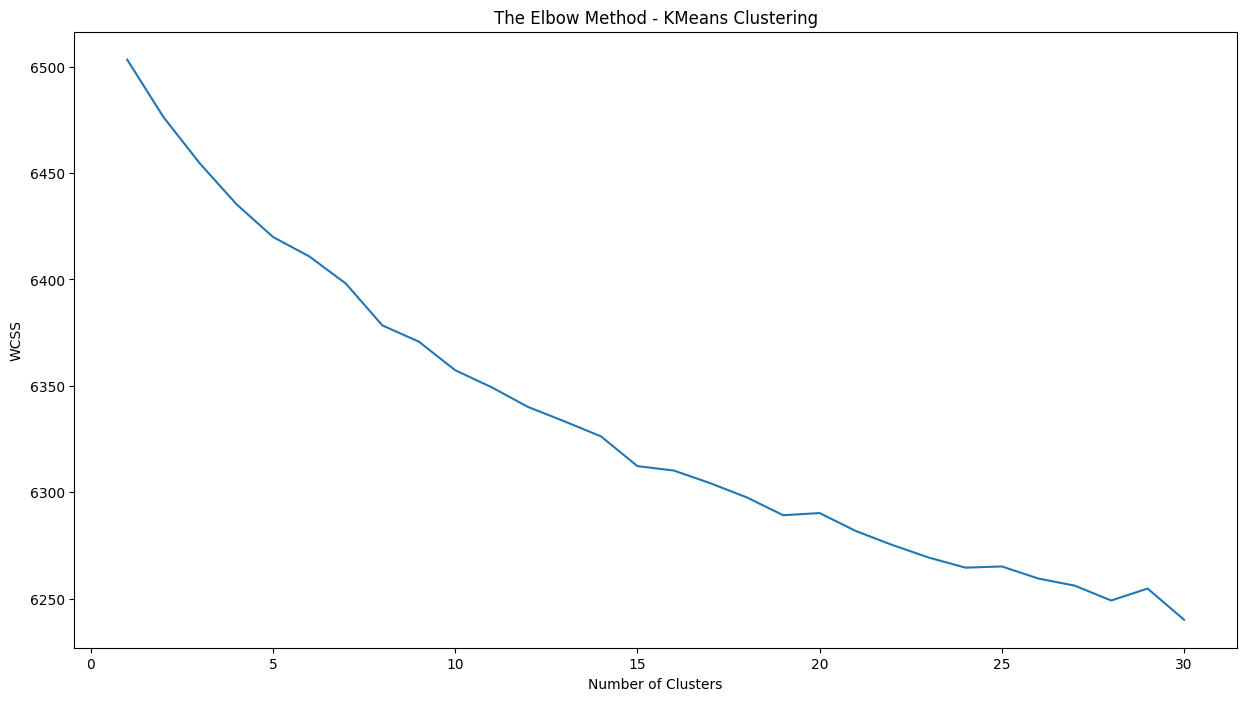

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for k in range(1,31):
  kmeans = KMeans(n_clusters=k,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(15,8))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

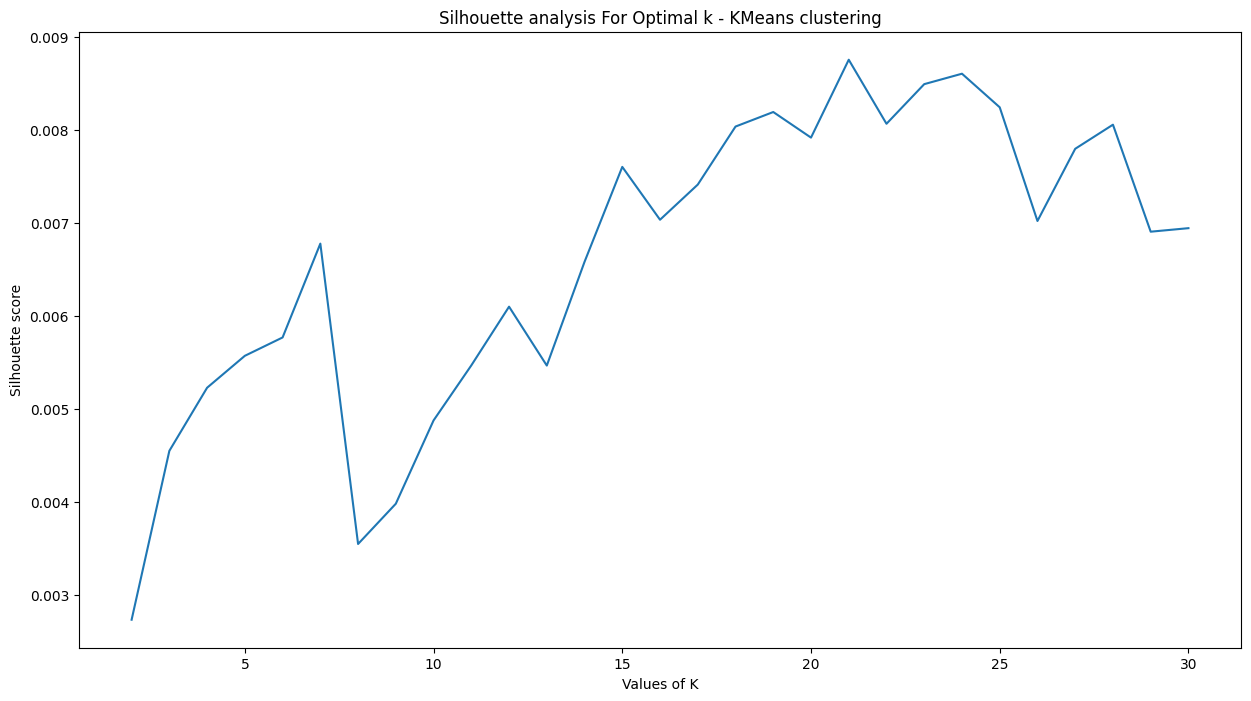

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

plt.figure(figsize=(15,8))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=40)

In [ ]:
# Adding a kmeans cluster number attribute
nf_df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6408.087339982209, 0.004782327104358112)


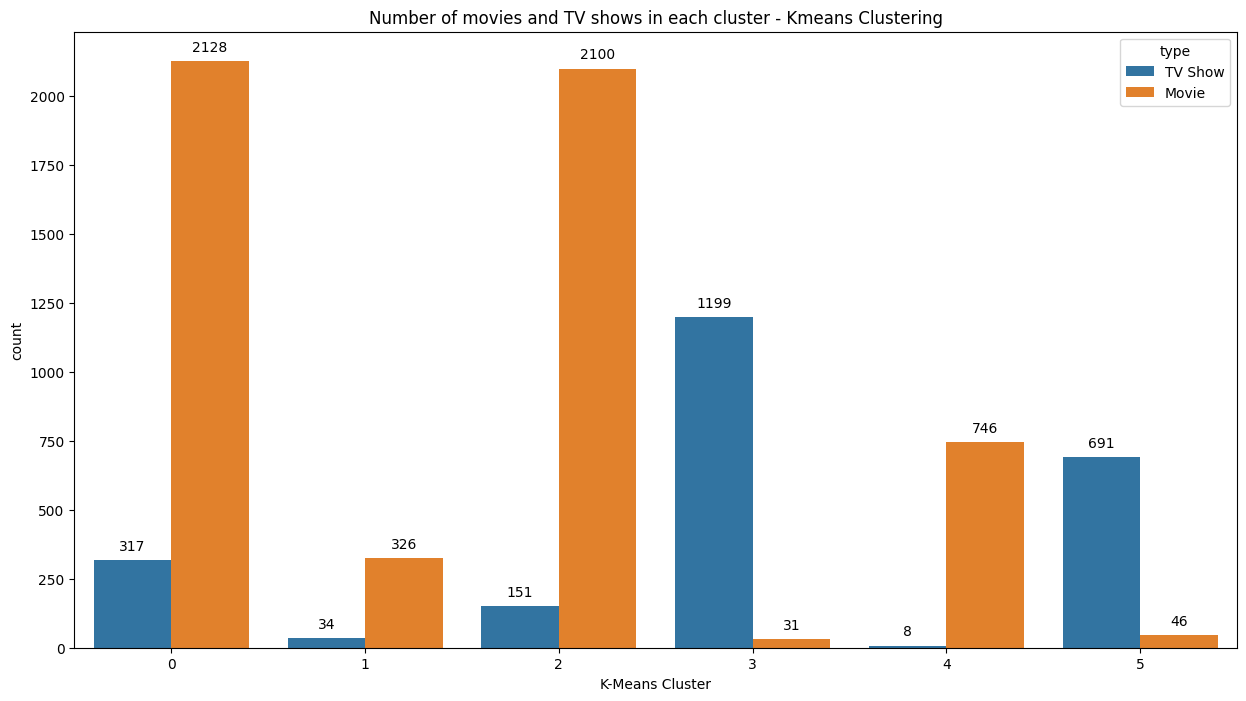

In [ ]:
# Number of Movies and TV Shows in each cluster
plt.figure(figsize=(15,8))
q = sns.countplot(x='kmeans_cluster',data=nf_df, hue='type')
plt.xlabel('K-Means Cluster')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in nf_df[nf_df['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)

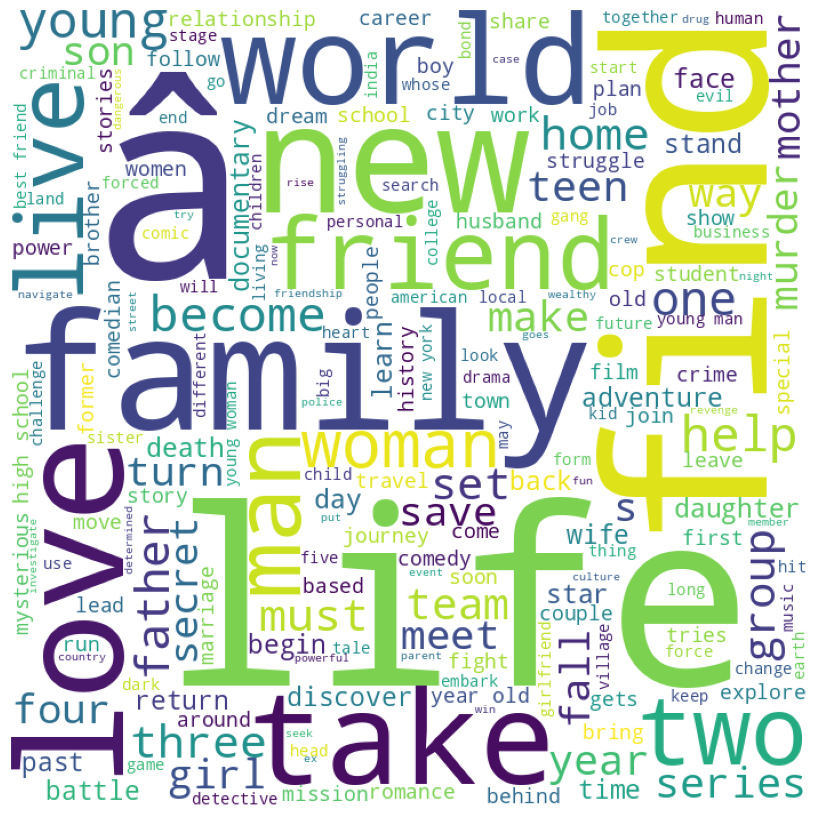

In [ ]:
# plot the WordCloud image                      
plt.figure(figsize = (15,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

### Hierarchical clustering

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Hierarchical clustering** is a clustering algorithm that groups similar data points together based on their proximity or similarity. It creates a hierarchy of clusters by iteratively merging or splitting clusters until a desired structure is achieved. This algorithm does not require the number of clusters to be specified in advance. It can be represented as a dendrogram, which provides insights into the relationships and hierarchical structure among the data points. Hierarchical clustering is useful for identifying patterns, similarities, and hierarchical organization within datasets.

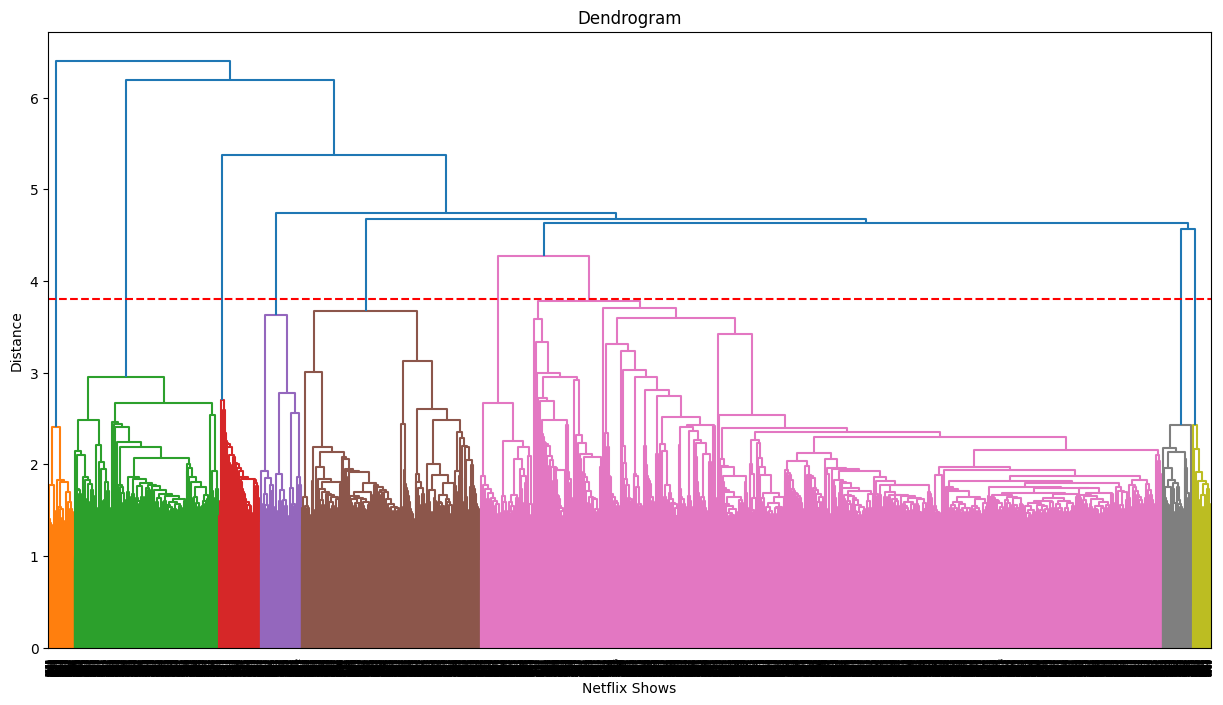

In [ ]:
# Building a dendrogram to determine the number of clusters
plt.figure(figsize=(15,8))  
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X_pca)

array([2, 3, 0, ..., 5, 4, 5])

In [ ]:
# Adding a kmeans cluster number attribute
nf_df['hierarchical_cluster'] = hierarchical.labels_

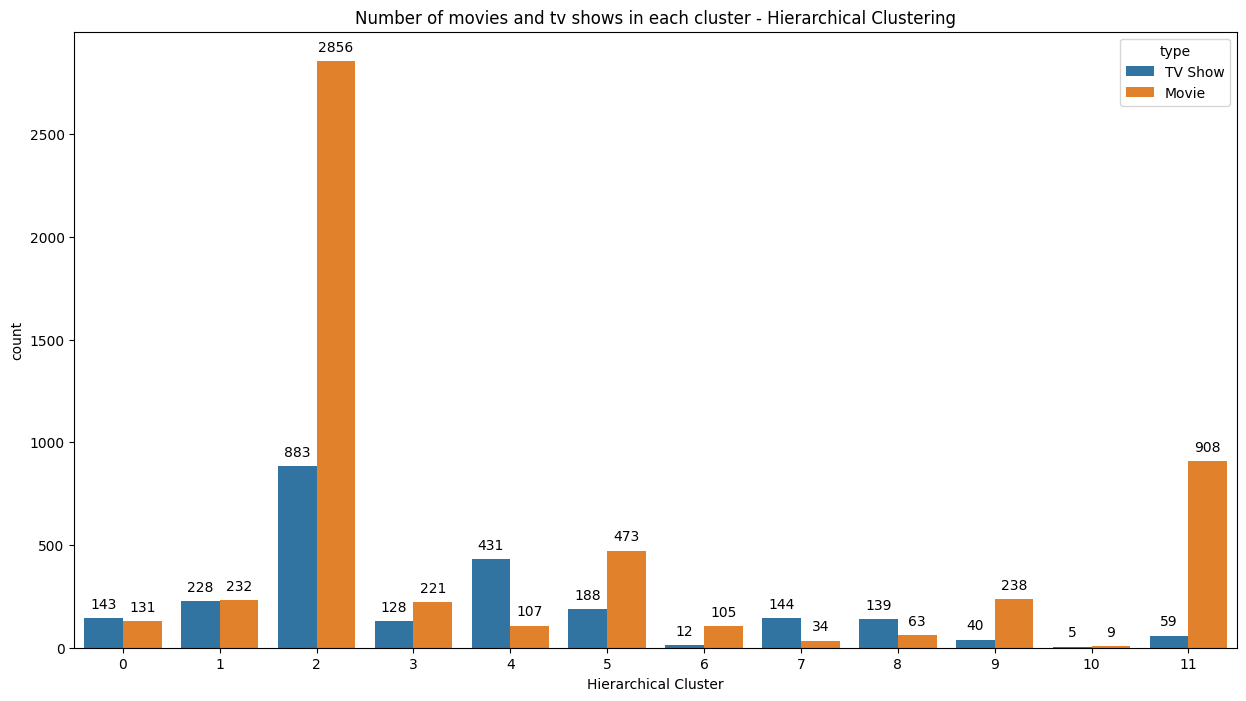

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(15,8))
q = sns.countplot(x='hierarchical_cluster',data=nf_df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
plt.xlabel('Hierarchical Cluster')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in nf_df[nf_df['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  return hierarchical_worldcloud

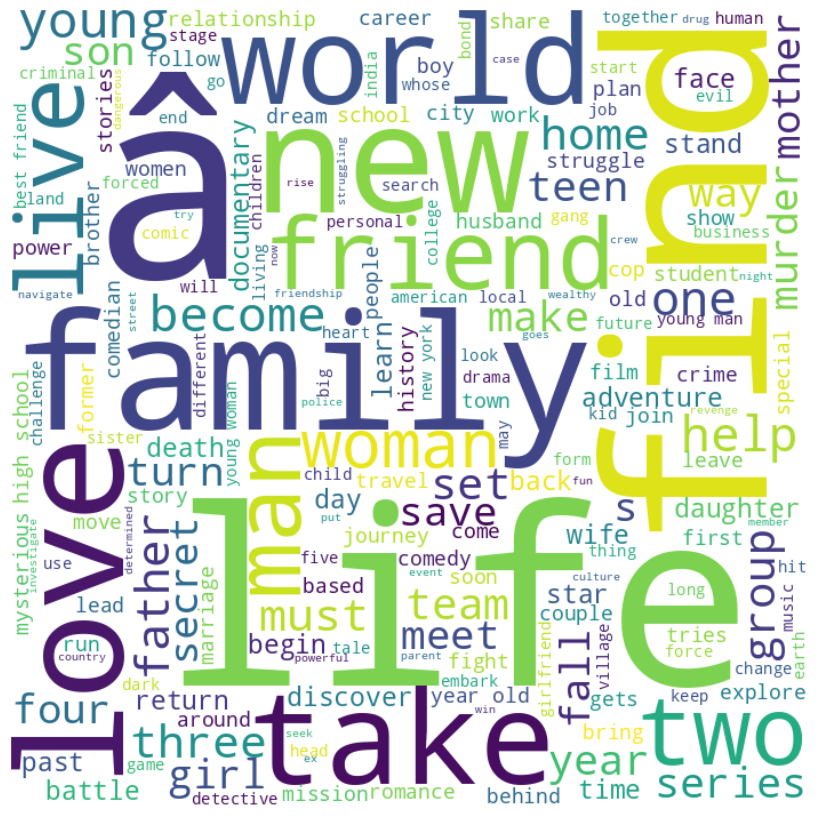

In [ ]:
# Plotting the WordCloud image
plt.figure(figsize=(15,8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

### Content based recommender system

In [ ]:
# Creating new column for Show ID from Index
nf_df['show_id'] = nf_df.index

In [ ]:
# Token to string conversion
def convert(lst):
  return ' '.join(lst)

nf_df['clustering'] = nf_df['clustering'].apply(lambda x: convert(x))

In [ ]:
# Setting title column as Index
nf_df.set_index('title', inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(nf_df['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# Cosine similarity Rows & Columns count
cosine_similarity.shape

(7777, 7777)

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(nf_df.index)

def Recommendation_for(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(nf_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

### Checking Recommended Shows

In [ ]:
Recommendation_for('Sacred Games')

If you liked 'Sacred Games', you may also enjoy:



['Tukaram',
 'Baazaar',
 'Delhi Crime',
 'Khan: No. 1 Crime Hunter',
 'AK vs AK',
 'Khotey Sikkey',
 'Hello Brother',
 'Phantom',
 'Dil Chahta Hai',
 'The Indian Detective']

In [ ]:
Recommendation_for('Zindagi Na Milegi Dobara')

If you liked 'Zindagi Na Milegi Dobara', you may also enjoy:



['Dil Dhadakne Do',
 'Luck by Chance',
 'Zero',
 'Katha',
 'Kabhi Haan Kabhi Naa',
 'Lakshya',
 'Cycle',
 'Shanghai',
 'Don 2',
 'Ishqiya']

In [ ]:
Recommendation_for('Unstoppable')

If you liked 'Unstoppable', you may also enjoy:



['Dancing Angels',
 'Nailed It! Mexico',
 'Rica, Famosa, Latina',
 'Club Friday To Be Continued - My Beautiful Tomboy',
 'Lugar de Mulher',
 'The Beat',
 'Queens of Comedy',
 'Club Friday To Be Continued - The Promise',
 'Killer Inside: The Mind of Aaron Hernandez',
 'Eurovision Song Contest']

In [ ]:
Recommendation_for('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy:



['Better Call Saul',
 'Exhibit A',
 'Women Behind Bars',
 'Trial By Media',
 'Inside the Criminal Mind',
 'Cold Case Files',
 'The Confession Tapes',
 "Marvel's The Punisher",
 'Killer Inside: The Mind of Aaron Hernandez',
 'Terrorism Close Calls']

# **Conclusion**

* In this project, our goal was to cluster Netflix shows based on their similarity, ensuring that shows within a cluster are similar while those in different clusters are dissimilar. 

* We began by exploring a dataset with 7787 records and 12 attributes. Missing values in the dataset were handled, and exploratory data analysis (EDA) was performed. From the EDA, we discovered that Netflix has more movies than TV shows, the number of shows on the platform is growing rapidly, and the majority of shows are produced in the United States, targeting adult and young adult audiences.

* After gaining insights from the EDA, we pre-processed the text data by removing punctuation and stop words. We used TF-IDF Vectorizer to transform the filtered data into vectors suitable for text-based clustering.

* For clustering, we focused on attributes such as director, cast, country, genre, and description. These attributes were tokenized, pre-processed, and then vectorized using TF-IDF Vectorizer. The resulting vectors contained 20,000 attributes. To handle the high dimensionality, Principal Component Analysis (PCA) was applied, reducing the components to 4,000 while still capturing over 80% of the variance.

* We performed clustering using the k-means algorithm, determining the optimal number of clusters as 6 based on the elbow method and Silhouette score analysis. Additionally, Agglomerative clustering was utilized, resulting in an optimal number of 12 clusters determined through dendrogram visualization.

* Furthermore, we developed a content-based recommender system using the similarity matrix obtained through cosine similarity. This recommender system provides 10 show recommendations to users based on the type of show they have watched.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***